# NLP CLASSIFICATION & SENTIMENT ANALYSIS


In this project, we explore the task of predicting star ratings assigned to restaurants based on customer reviews. With the increasing importance of online reviews in influencing consumer decisions, accurately predicting star ratings can provide valuable insights for businesses to understand customer satisfaction and improve their services.

<img src ='original.jpg'>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("restaurant.csv")

In [4]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


In [5]:
df['date'].value_counts()

date
2012-12-04 03:10:18    1
2018-10-28 21:08:51    1
2017-08-07 06:51:01    1
2015-12-20 19:15:17    1
2014-10-08 00:35:25    1
                      ..
2014-10-17 19:56:41    1
2017-06-10 02:51:55    1
2015-04-07 06:24:41    1
2016-08-18 23:34:27    1
2019-11-30 22:36:56    1
Name: count, Length: 10417, dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [7]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012,12,4
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014,1,17
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015,6,8
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016,12,19
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015,7,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,2019,11,17
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,2019,11,12
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,2019,12,12
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,2019,11,1


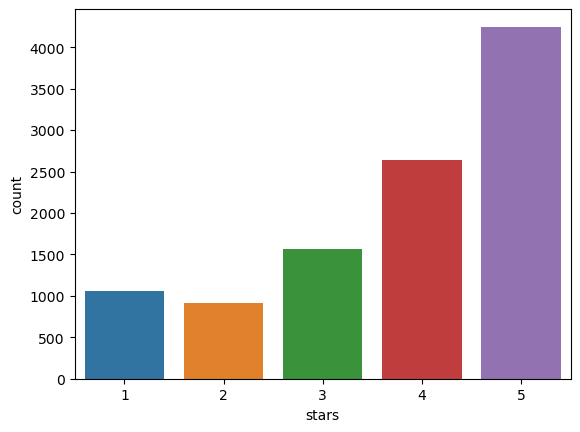

In [8]:
sns.countplot(x=df['stars']);

In [9]:
pd.DataFrame({'Stars': (df['stars'].value_counts() / df['stars'].value_counts().sum()).index, 'Percentage': (df['stars'].value_counts() / df['stars'].value_counts().sum()).values})

,Stars,Percentage
0,5,0.407699
1,4,0.253048
2,3,0.149851
3,1,0.101373
4,2,0.088029


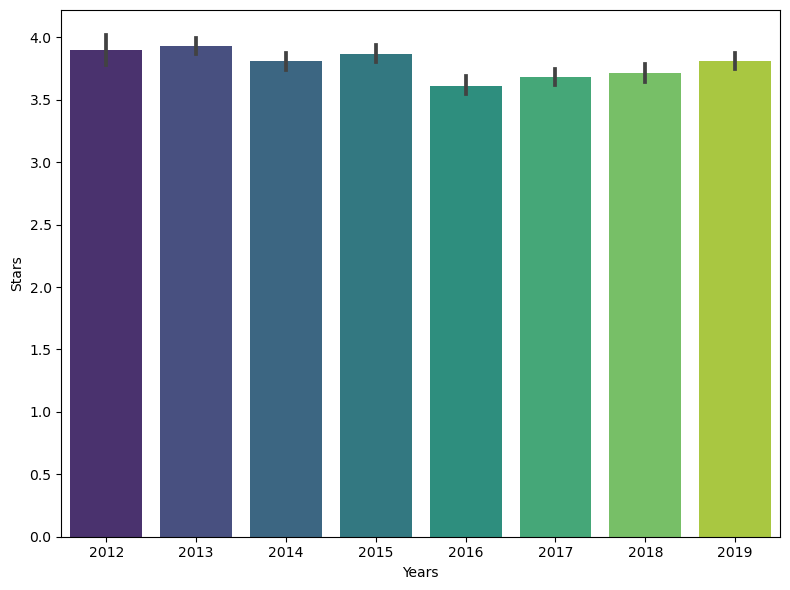

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='stars', data=df, palette='viridis')
plt.xlabel('Years')
plt.ylabel('Stars')
plt.tight_layout()

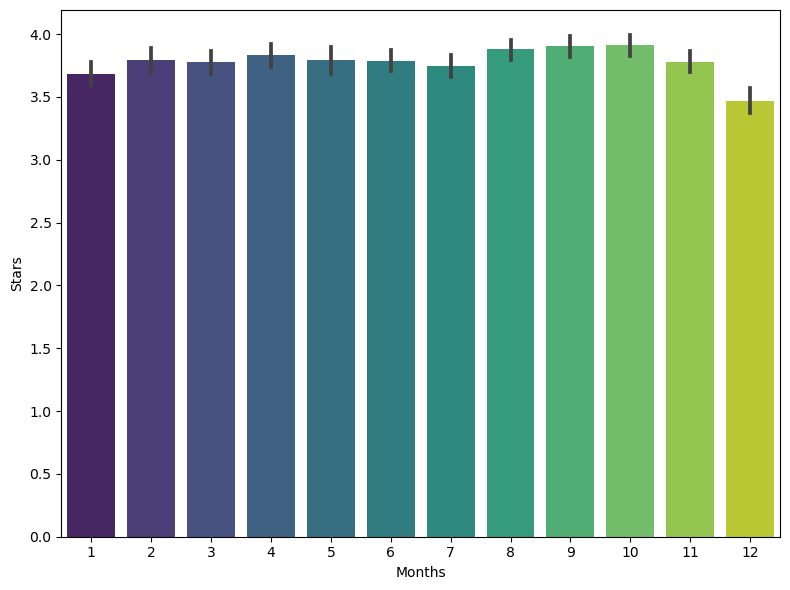

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='stars', data=df, palette='viridis')
plt.xlabel('Months')
plt.ylabel('Stars')
plt.tight_layout()

In [12]:
def sentiment(star):
    if star in [1, 2]:
        return 'Negative'
    elif star == 3:
        return 'Neutral'
    elif star in [4, 5]:
        return 'Positive'
    
df['sentiment'] = df['stars'].apply(sentiment)
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012,12,4,Positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014,1,17,Positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015,6,8,Positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016,12,19,Negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015,7,28,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,2019,11,17,Positive
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,2019,11,12,Positive
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,2019,12,12,Positive
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,2019,11,1,Positive


In [13]:
df['text'][0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [14]:
df['text']=df['text'].str.lower()                             #Küçük Harfe Cevirme
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)    #Noktalama Isaretlerini Kaldirma
df['text']=df['text'].str.replace('\n',' ',regex=True)        #Satır Atlamalarını Kaldirma
df['text']=df['text'].str.replace('\d+','',regex=True)        #Rakamları Kaldirma
df['text']=df['text'].str.replace('\r',' ',regex=True)        #Satır Atlamalarını Kaldirma

In [15]:
df['text'][0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we ate  the seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it though  the prime rib was the best ive ever had  i loved the sweet potato tots  i even have pho  the music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightful  i will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [16]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#TF term frequency (Bir kelime bir cümlede kaç defa geçiyor) 
#IDF Inverse Document Frequency (Bir kelime tüm dokümanda kaç defa geçiyor)

In [17]:
from textblob import TextBlob
def lemmafn(text):
    words=TextBlob(text).words
    return [word.lemmatize() for word in words]

In [18]:
def sentimentfn(text):
    words=TextBlob(text).words
    return [word.sentiment() for word in words]

In [19]:
#vect = TfidfVectorizer(max_features=2000)  # Adjust max_features as needed


In [20]:
#vect=CountVectorizer(stop_words='english',ngram_range=(1,3),max_features=10000,analyzer=lemmafn)

In [21]:
x=df['text']
y=df['sentiment']

In [22]:
y

0        Positive
1        Positive
2        Positive
3        Negative
4        Positive
           ...   
10412    Positive
10413    Positive
10414    Positive
10415    Positive
10416    Positive
Name: sentiment, Length: 10417, dtype: object

In [23]:
#x=vect.fit_transform(x)

### Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [25]:
cv2=CountVectorizer(stop_words='english',ngram_range=(1,3),max_features=10000,analyzer=lemmafn)
x1=cv2.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)

In [27]:
l=LogisticRegression()
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_pred,y_test)

0.79510556621881

In [28]:
m=MultinomialNB()
m.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_pred,y_test)

0.79510556621881

In [29]:
tf=TfidfVectorizer(stop_words='english', ngram_range=(1,3),max_features=10000,analyzer=lemmafn)
x2=tf.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,random_state=42,test_size=0.20)

In [31]:
l=LogisticRegression()
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_pred,y_test)

0.8095009596928983

In [32]:
m=MultinomialNB()
m.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_pred,y_test)

0.8095009596928983

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
confusion_matrix(y_test,y_pred)

array([[ 281,   35,   73],
       [  77,   80,  158],
       [  24,   30, 1326]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

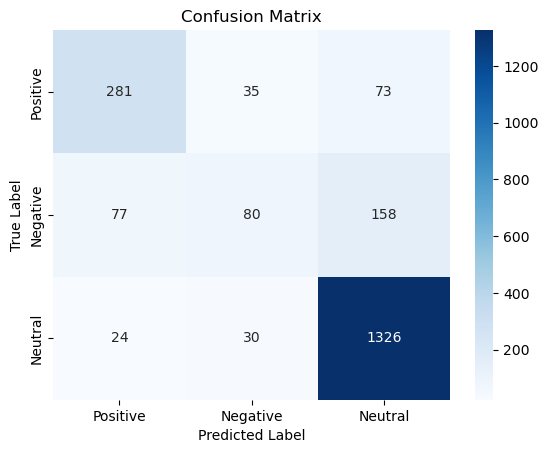

In [35]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Normalized Confusion Matrix')

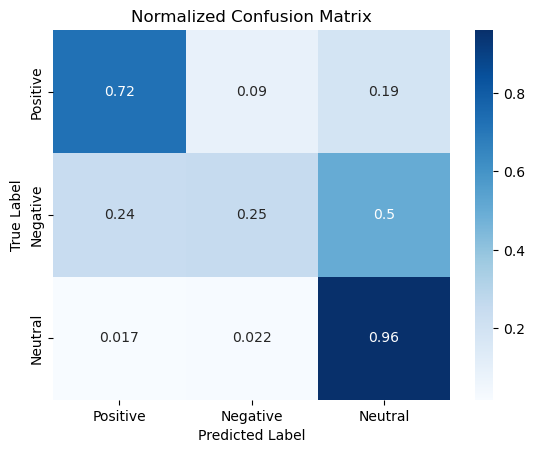

In [36]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')

In [37]:
#!pip install nltk

In [38]:
import nltk

In [39]:
#nltk.download('vader_lexicon')

In [40]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,12,4,Positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of gods baccarnal buffet in ca...,2014-01-17 00:50:50,2014,1,17,Positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,6,8,Positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,12,19,Negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,7,28,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,2019,11,17,Positive
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one fo...,2019-11-12 02:23:07,2019,11,12,Positive
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,2019,12,12,Positive
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,2019,11,1,Positive


In [41]:
df=df.drop(['user_id','Unnamed: 0','review_id','business_id','useful','funny','cool','date','year','month','day'],axis=1)

In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
from langdetect import detect
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
sanalyzer = SentimentIntensityAnalyzer()
df[['neg', 'neu', 'pos', 'compound']]=df['text'].apply(lambda x: pd.Series(sanalyzer.polarity_scores(x)))
df['language'] = df['text'].apply(lambda x: detect(x))

In [43]:
df

,stars,text,sentiment,polarity,subjectivity,neg,neu,pos,compound,language
0,5,after getting food poisoning at the palms hote...,Positive,0.367452,0.605702,0.092,0.657,0.251,0.9902,en
1,4,a feast worthy of gods baccarnal buffet in ca...,Positive,0.219409,0.537292,0.090,0.755,0.155,0.9973,en
2,4,the crab legs are better than the ones at wick...,Positive,-0.134722,0.731944,0.130,0.773,0.098,-0.6628,en
3,1,not worth it too salty food and expensive this...,Negative,-0.325000,0.400000,0.089,0.911,0.000,-0.1695,en
4,5,i would give this infinite stars if i could my...,Positive,0.362500,0.725000,0.031,0.739,0.230,0.9325,en
...,...,...,...,...,...,...,...,...,...,...
10412,5,best buffet ever irma was great served us bett...,Positive,0.543750,0.481250,0.000,0.537,0.463,0.9042,en
10413,4,hollllllyyyy moleyyyy this buffet was one fo...,Positive,0.210101,0.586869,0.000,0.749,0.251,0.9524,en
10414,5,the selection is amazing and all the food is e...,Positive,0.480000,0.630000,0.000,0.504,0.496,0.9565,en
10415,4,one of the best buffets ive had in vegas my on...,Positive,0.185185,0.533333,0.077,0.748,0.175,0.5719,en


In [44]:
#pip install --upgrade Pillow

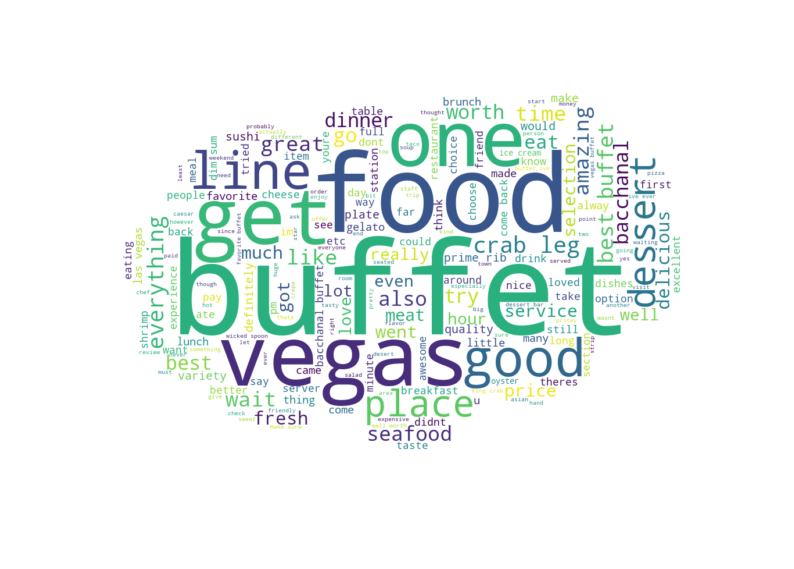

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import stylecloud as sc
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

text_5star = df[df['stars'] == 5]['text']
text_1star = df[df['stars'] == 1]['text']
text_positive = df[df['sentiment'] == 'Positive']['text']
text_negative = df[df['sentiment'] == 'Negative']['text']

mask=Image.open('cloud.png')
mask_array = np.array(mask)
wc = WordCloud(background_color='white', stopwords=stop_words, mask=mask_array)
wc.generate(' '.join(text_5star))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

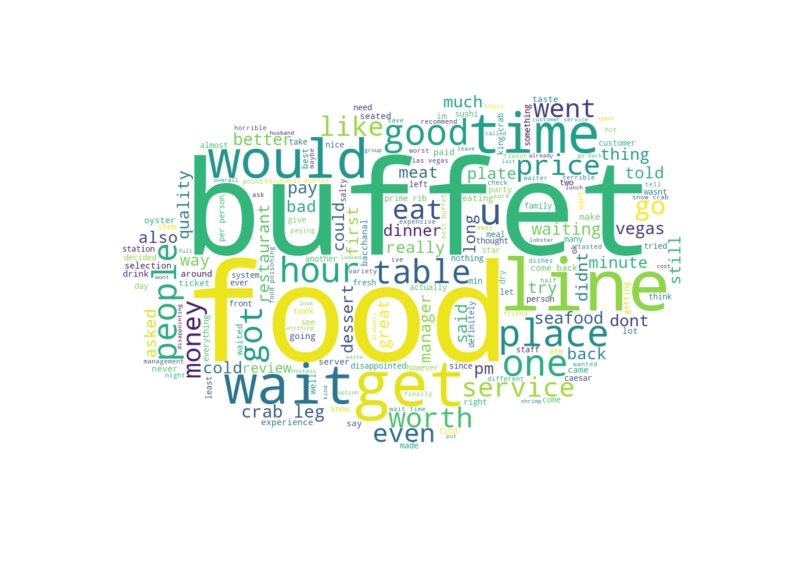

In [57]:
wc.generate(' '.join(text_1star))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

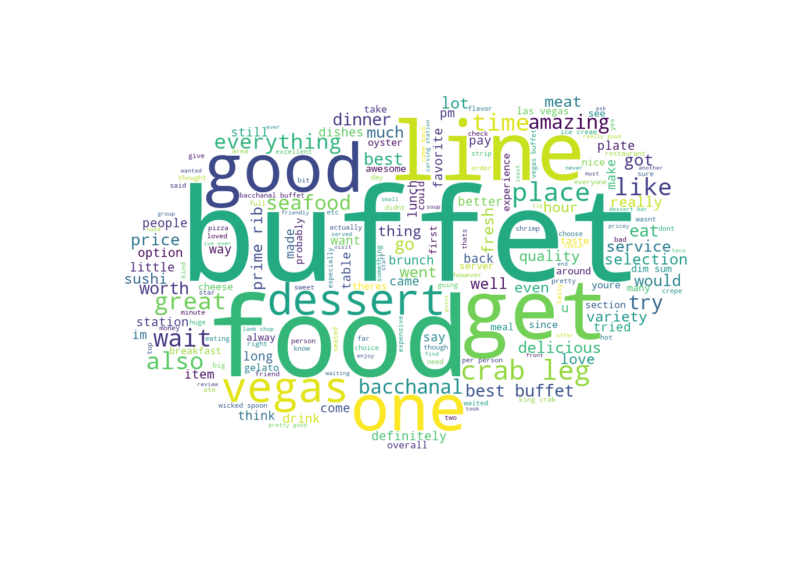

In [58]:
wc.generate(' '.join(text_positive))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

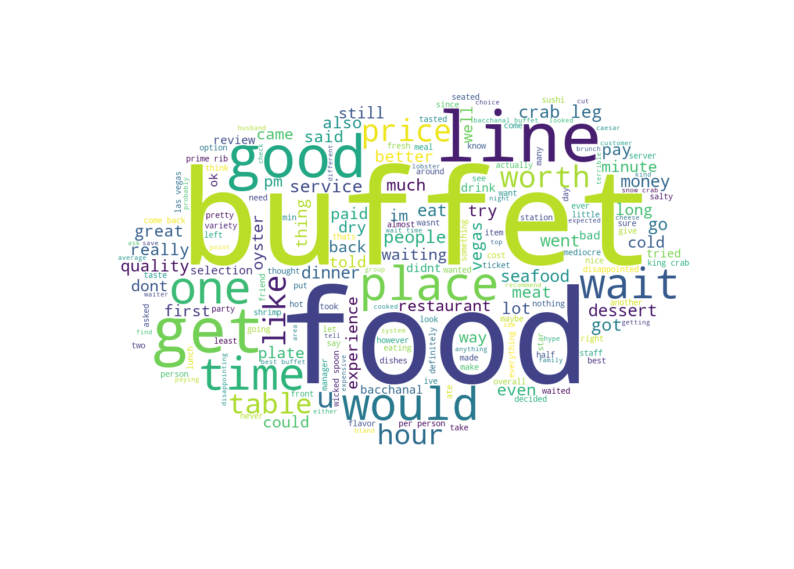

In [59]:
wc.generate(' '.join(text_negative))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

tokens = word_tokenize(df['text'].str.cat(sep=' '))
Counter([' '.join(phrase) for phrase in ngrams(tokens, 2)])

Counter({'of the': 5700,
         'it was': 4461,
         'the food': 4195,
         'and the': 3613,
         'crab legs': 3576,
         'the best': 3290,
         'for the': 3142,
         'i was': 2824,
         'to the': 2803,
         'in vegas': 2633,
         'in the': 2573,
         'on the': 2485,
         'the buffet': 2456,
         'if you': 2324,
         'this place': 2288,
         'and i': 2277,
         'this buffet': 2267,
         'to get': 2196,
         'at the': 2097,
         'to be': 2071,
         'was a': 2049,
         'you can': 1925,
         'they have': 1885,
         'this is': 1880,
         'for a': 1830,
         'i had': 1782,
         'we were': 1766,
         'of food': 1740,
         'food was': 1733,
         'the price': 1679,
         'prime rib': 1673,
         'was the': 1663,
         'i would': 1625,
         'best buffet': 1610,
         'there was': 1609,
         'but i': 1607,
         'is the': 1578,
         'buffet in': 1555,
     

In [63]:
Counter([' '.join(phrase) for phrase in ngrams(tokens, 3)])

Counter({'the best buffet': 1159,
         'the food was': 1156,
         'one of the': 1010,
         'a lot of': 982,
         'buffet in vegas': 910,
         'best buffet in': 819,
         'the food is': 750,
         'the crab legs': 732,
         'of the food': 671,
         'this place is': 604,
         'in las vegas': 568,
         'this is the': 535,
         'of the best': 534,
         'some of the': 522,
         'the prime rib': 521,
         'there was a': 519,
         'it was a': 498,
         'to get in': 491,
         'this buffet is': 472,
         'and it was': 469,
         'they have a': 466,
         'on the strip': 465,
         'to choose from': 462,
         'king crab legs': 460,
         'crab legs and': 448,
         'is the best': 435,
         'crab legs were': 415,
         'of the buffet': 409,
         'for a buffet': 403,
         'wait in line': 391,
         'if you are': 389,
         'i had to': 387,
         'there is a': 384,
         'the qua

In [65]:
tokens = word_tokenize(text_positive.str.cat(sep=' '))
Counter([' '.join(phrase) for phrase in ngrams(tokens, 2)])

Counter({'of the': 3513,
         'it was': 2582,
         'the best': 2578,
         'crab legs': 2417,
         'the food': 2305,
         'and the': 2227,
         'in vegas': 2040,
         'for the': 1681,
         'to the': 1611,
         'if you': 1601,
         'i was': 1583,
         'on the': 1581,
         'in the': 1523,
         'they have': 1498,
         'you can': 1495,
         'the buffet': 1464,
         'this buffet': 1449,
         'and i': 1419,
         'this place': 1401,
         'this is': 1385,
         'best buffet': 1378,
         'of food': 1229,
         'at the': 1208,
         'buffet in': 1188,
         'was a': 1184,
         'is the': 1174,
         'to get': 1165,
         'for a': 1111,
         'i had': 1102,
         'is a': 1099,
         'prime rib': 1098,
         'it is': 1073,
         'worth it': 1055,
         'to try': 1037,
         'a buffet': 1035,
         'on a': 1015,
         'to be': 1013,
         'one of': 1007,
         'there 

In [66]:
tokens = word_tokenize(text_positive.str.cat(sep=' '))
Counter([' '.join(phrase) for phrase in ngrams(tokens, 3)])

Counter({'the best buffet': 954,
         'one of the': 744,
         'buffet in vegas': 718,
         'best buffet in': 659,
         'a lot of': 558,
         'the food was': 557,
         'the food is': 508,
         'the crab legs': 459,
         'of the best': 447,
         'in las vegas': 424,
         'this place is': 419,
         'this is the': 417,
         'to choose from': 379,
         'they have a': 375,
         'is the best': 362,
         'on the strip': 362,
         'this buffet is': 358,
         'of the food': 346,
         'some of the': 334,
         'king crab legs': 310,
         'and it was': 307,
         'the prime rib': 298,
         'it was a': 296,
         'there was a': 295,
         'crab legs and': 285,
         'made to order': 278,
         'if you are': 275,
         'ive been to': 270,
         'of the buffet': 266,
         'for a buffet': 265,
         'to get in': 264,
         'there is a': 263,
         'buffets in vegas': 258,
         'vari

In [68]:
tokens = word_tokenize(text_negative.str.cat(sep=' '))
Counter([' '.join(phrase) for phrase in ngrams(tokens, 2)])

Counter({'of the': 1144,
         'the food': 1058,
         'it was': 942,
         'for the': 780,
         'and the': 754,
         'to the': 736,
         'i was': 660,
         'to get': 621,
         'to be': 612,
         'in the': 597,
         'we were': 558,
         'the buffet': 553,
         'crab legs': 534,
         'this place': 531,
         'at the': 511,
         'food was': 503,
         'and i': 467,
         'on the': 465,
         'in line': 461,
         'this buffet': 457,
         'not worth': 416,
         'was a': 413,
         'the price': 392,
         'for a': 390,
         'was the': 383,
         'if you': 364,
         'the line': 357,
         'the best': 340,
         'all the': 329,
         'i had': 325,
         'was not': 318,
         'had to': 318,
         'i would': 317,
         'there was': 316,
         'in vegas': 309,
         'to wait': 288,
         'worth the': 286,
         'this is': 281,
         'a lot': 279,
         'to eat': 27

In [69]:
tokens = word_tokenize(text_negative.str.cat(sep=' '))
Counter([' '.join(phrase) for phrase in ngrams(tokens, 3)])

Counter({'the food was': 325,
         'not worth the': 212,
         'a lot of': 190,
         'of the food': 167,
         'to get in': 138,
         'one of the': 136,
         'the food is': 133,
         'the crab legs': 127,
         'in line for': 117,
         'this place is': 116,
         'not worth it': 115,
         'buffet in vegas': 109,
         'the best buffet': 104,
         'the prime rib': 104,
         'to be seated': 103,
         'for the price': 103,
         'there was a': 102,
         'to wait in': 101,
         'crab legs were': 96,
         'to come back': 94,
         'wait in line': 93,
         'it was a': 93,
         'we had to': 93,
         'best buffet in': 89,
         'and it was': 87,
         'king crab legs': 84,
         'the only thing': 83,
         'in las vegas': 83,
         'i had to': 82,
         'crab legs and': 80,
         'worth the price': 78,
         'to get a': 77,
         'most of the': 77,
         'prime rib was': 76,
     